In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu
import folium
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import statsmodels.api as sm
import sqlite3

In [2]:
df_BarcelonaSept24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsB06Sep24.csv')
df_BarcelonaJune24 =pd.read_csv(r'C:\Users\alber\Downloads\listingsB15June24.csv')
df_BarcelonaMarch24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsB20March24.csv')
df_BarcelonaDec23 = pd.read_csv(r'C:\Users\alber\Downloads\listingsB13Dec23.csv')
df_SevillaJune24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsS30June24.csv')
df_SevillaMarch24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsS31March24.csv')
df_SevillaDec23 = pd.read_csv(r'C:\Users\alber\Downloads\listingsS29Dec23.csv')
df_MadridSept24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsM11Sep24.csv')
df_MadridJune24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsM15June24.csv')
df_MadridMarch24 = pd.read_csv(r'C:\Users\alber\Downloads\listingsM22March24.csv')
df_MadridDec23 = pd.read_csv(r'C:\Users\alber\Downloads\listingsM15Dec23.csv')

In [3]:
df_BSept24_copia = df_BarcelonaSept24.copy()
df_BMarch24_copia = df_BarcelonaMarch24.copy()
df_BJune24_copia = df_BarcelonaJune24.copy()
df_BDec23_copia = df_BarcelonaDec23.copy()

df_MDec23_copia = df_MadridDec23.copy()
df_MJune24_copia = df_MadridJune24.copy()
df_MSept24_copia = df_MadridSept24.copy()
df_MMarch24_copia = df_MadridMarch24.copy()

df_SJune24_copia = df_SevillaJune24.copy()
df_SMarch24_copia = df_SevillaMarch24.copy()
df_SDec23_copia = df_BarcelonaDec23.copy()

df_BSept24_copia['month'] = 'September'
df_BMarch24_copia['month'] = 'March'
df_BJune24_copia['month'] = 'June'
df_BDec23_copia['month'] = 'December'  

df_MDec23_copia['month'] = 'December'
df_MJune24_copia['month'] = 'June'
df_MSept24_copia['month'] = 'September'
df_MMarch24_copia['month'] = 'March'

df_SJune24_copia['month'] = 'June'
df_SMarch24_copia['month'] = 'March'
df_SDec23_copia['month'] = 'December'

df_BSept24_copia['state'] = 'Barcelona'
df_BMarch24_copia['state'] = 'Barcelona'
df_BJune24_copia['state'] = 'Barcelona'
df_BDec23_copia['state'] = 'Barcelona'  

df_MDec23_copia['state'] = 'Madrid'
df_MJune24_copia['state'] = 'Madrid'
df_MSept24_copia['state'] = 'Madrid'
df_MMarch24_copia['state'] = 'Madrid'

df_SJune24_copia['state'] = 'Sevilla'
df_SMarch24_copia['state'] = 'Sevilla'
df_SDec23_copia['state'] = 'Sevilla'

df_concatenado_total = pd.concat([df_BSept24_copia, df_BMarch24_copia, df_BJune24_copia, df_BDec23_copia, df_MSept24_copia, df_MMarch24_copia, df_MJune24_copia, df_MDec23_copia, df_SMarch24_copia, df_SJune24_copia, df_SDec23_copia ], ignore_index=True)

df_concatenado_total.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214637 entries, 0 to 214636
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              214637 non-null  int64  
 1   name                            214637 non-null  object 
 2   host_id                         214637 non-null  int64  
 3   host_name                       214605 non-null  object 
 4   neighbourhood_group             214637 non-null  object 
 5   neighbourhood                   214637 non-null  object 
 6   latitude                        214637 non-null  float64
 7   longitude                       214637 non-null  float64
 8   room_type                       214637 non-null  object 
 9   price                           177265 non-null  float64
 10  minimum_nights                  214637 non-null  int64  
 11  number_of_reviews               214637 non-null  int64  
 12  last_review     

In [4]:

# Concatenar los DataFrames
df_concatenado_Barcelona = pd.concat([df_BSept24_copia, df_BMarch24_copia, df_BJune24_copia, df_BDec23_copia], ignore_index=True)


# Concatenar los DataFrames
df_concatenado_Madrid = pd.concat([df_MSept24_copia, df_MMarch24_copia, df_MJune24_copia, df_MDec23_copia], ignore_index=True)


# Concatenar los DataFrames
df_concatenado_Sevilla = pd.concat([df_SMarch24_copia, df_SJune24_copia, df_SDec23_copia], ignore_index=True)




Valores nulos por columna:
 id                                     0
name                                   0
host_id                                0
host_name                             32
neighbourhood_group                    0
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                              37372
minimum_nights                         0
number_of_reviews                      0
last_review                        47237
reviews_per_month                  47237
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
license                           125016
month                                  0
state                                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214637 entries, 0 to 214636
Data columns (total 19 columns):
 #   Column                 

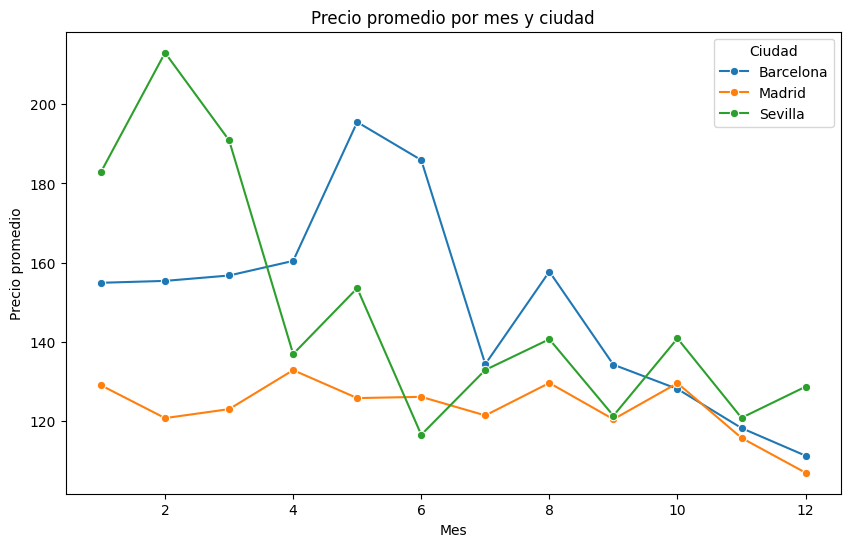

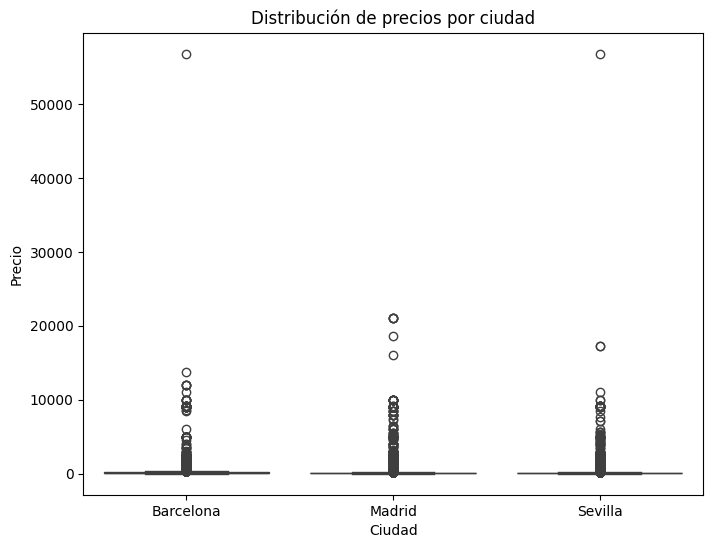

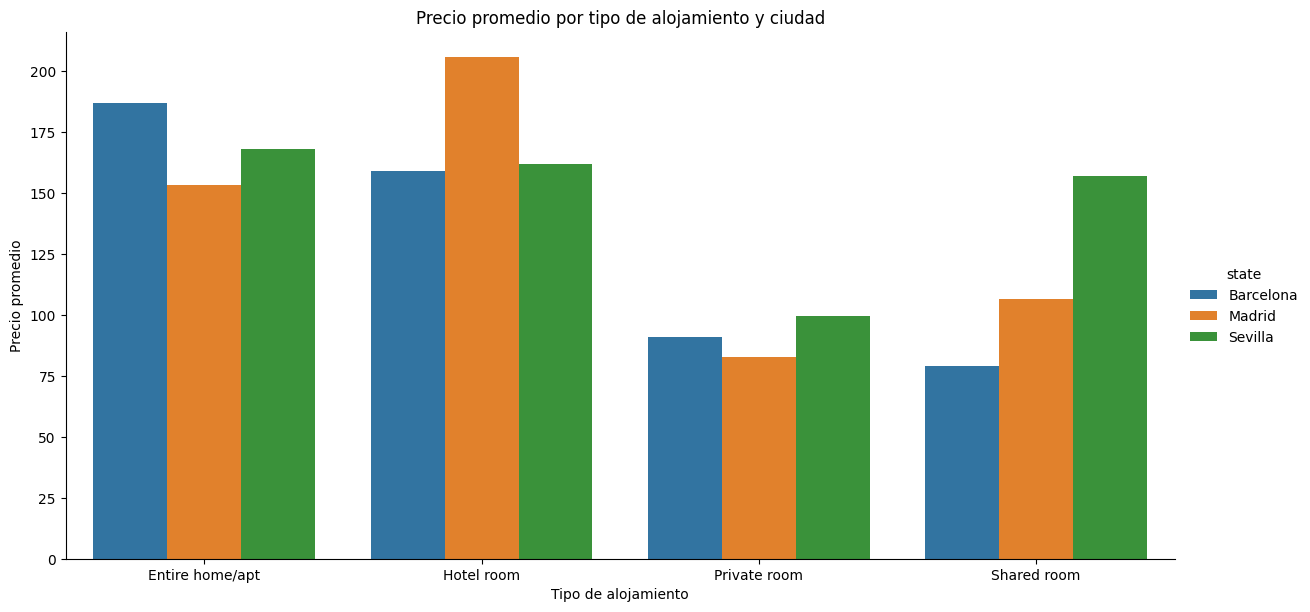

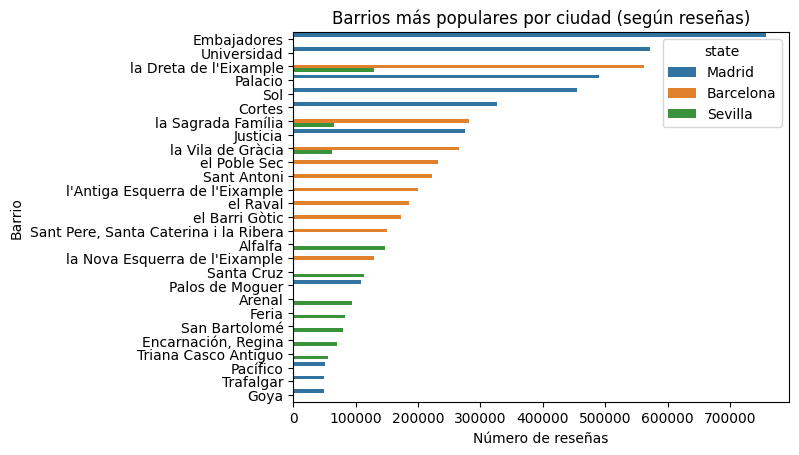

Estructura de cluster_data: (301, 12)
Primeras filas de cluster_data:
 month                   1.0         2.0         3.0         4.0         5.0   \
neighbourhood                                                                  
Abrantes           78.800000   69.700000   50.941176   59.333333   45.062500   
Acacias           102.697674   90.026316  132.340206   52.133333   97.560606   
Adelfas            98.280000   91.200000   93.534884  111.571429   98.029412   
Aeropuerto          0.000000   59.000000   39.600000  100.000000   60.000000   
Aeropuerto Viejo    0.000000  100.000000   65.000000    0.000000  100.000000   

month                   6.0         7.0         8.0        9.0        10.0  \
neighbourhood                                                                
Abrantes           55.375000   60.095238   58.333333  55.200000  49.900000   
Acacias           101.758065  106.805970   95.120482  93.933333  92.966667   
Adelfas           132.111111   90.296296  103.968750  84

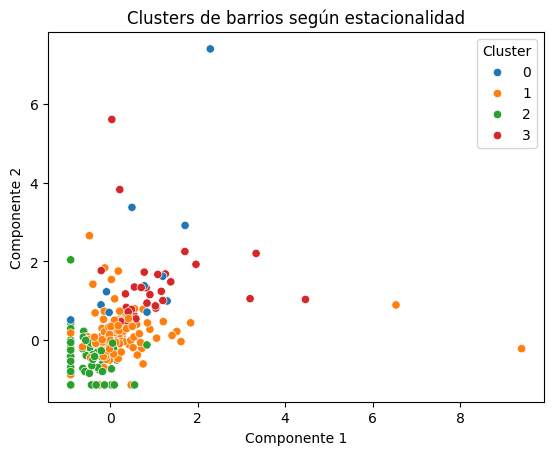

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     213.8
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          1.74e-138
Time:                        11:02:44   Log-Likelihood:            -1.5517e+06
No. Observations:              214637   AIC:                         3.103e+06
Df Residuals:                  214633   BIC:                         3.103e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              122.0183      1.174  

C:\Users\alber\AppData\Local\Temp\ipykernel_21916\2729243627.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=city_data, x='month', y='price', palette='coolwarm')


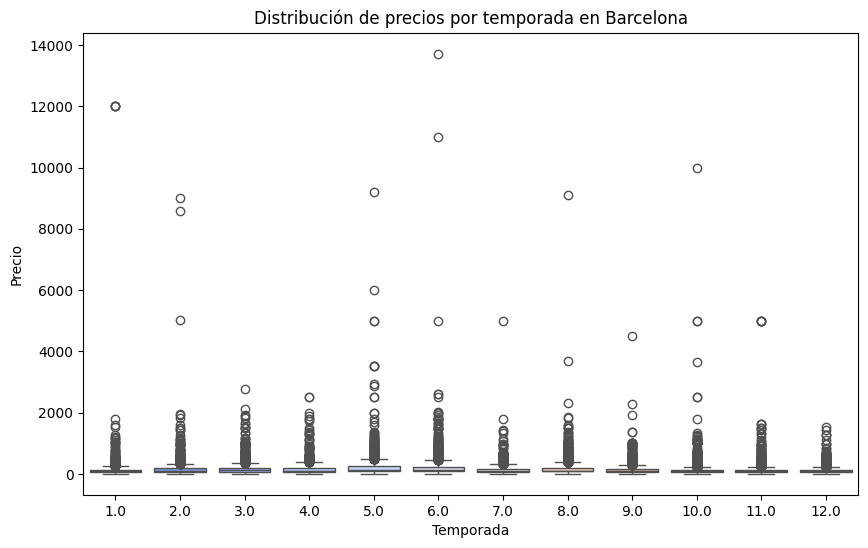

Advertencia: No hay suficientes datos para realizar las pruebas estadísticas en Barcelona.


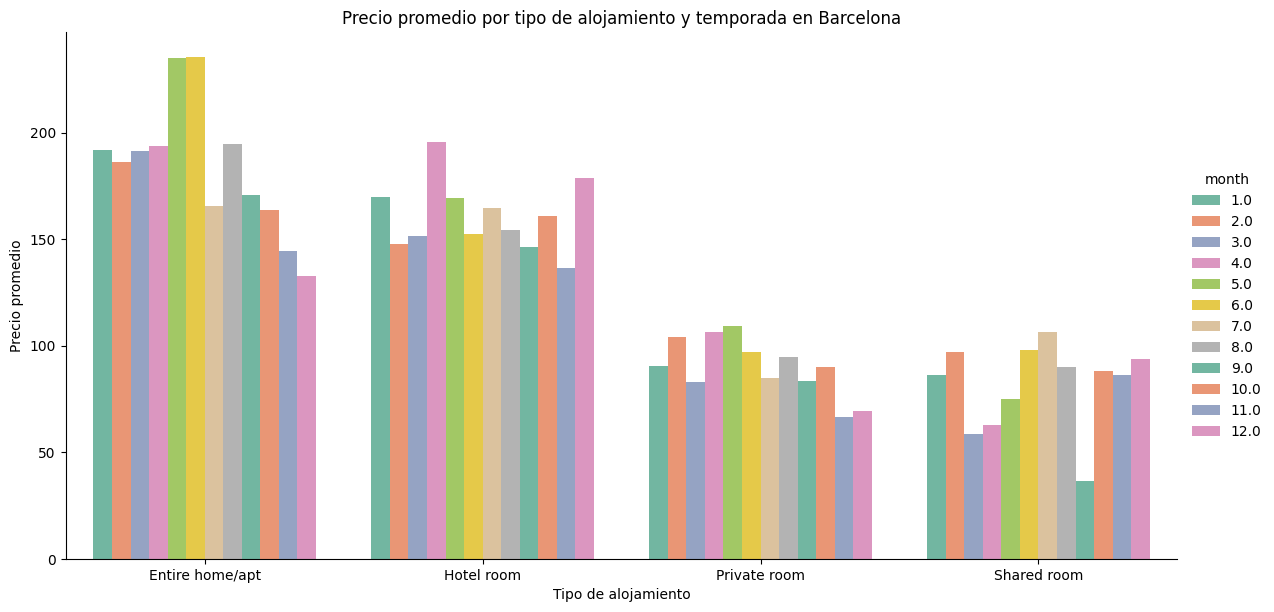



=== Análisis para Madrid ===



C:\Users\alber\AppData\Local\Temp\ipykernel_21916\2729243627.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=city_data, x='month', y='price', palette='coolwarm')


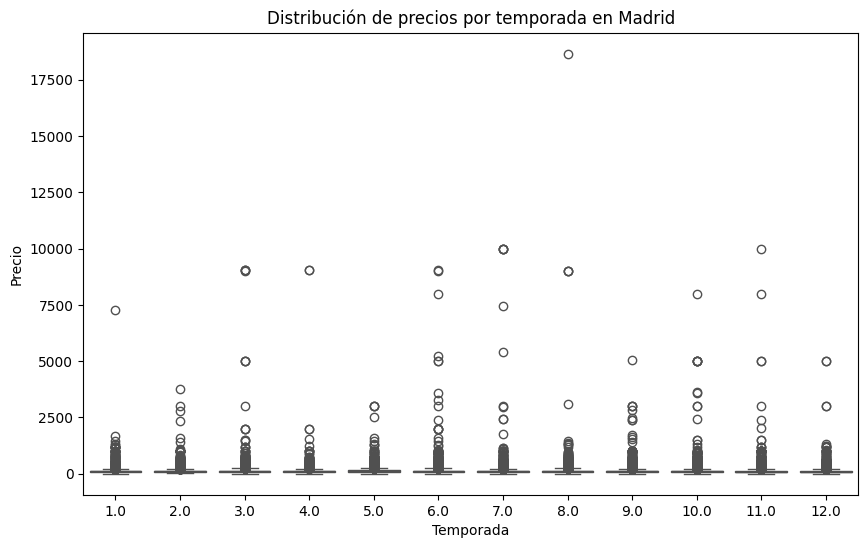

Advertencia: No hay suficientes datos para realizar las pruebas estadísticas en Madrid.


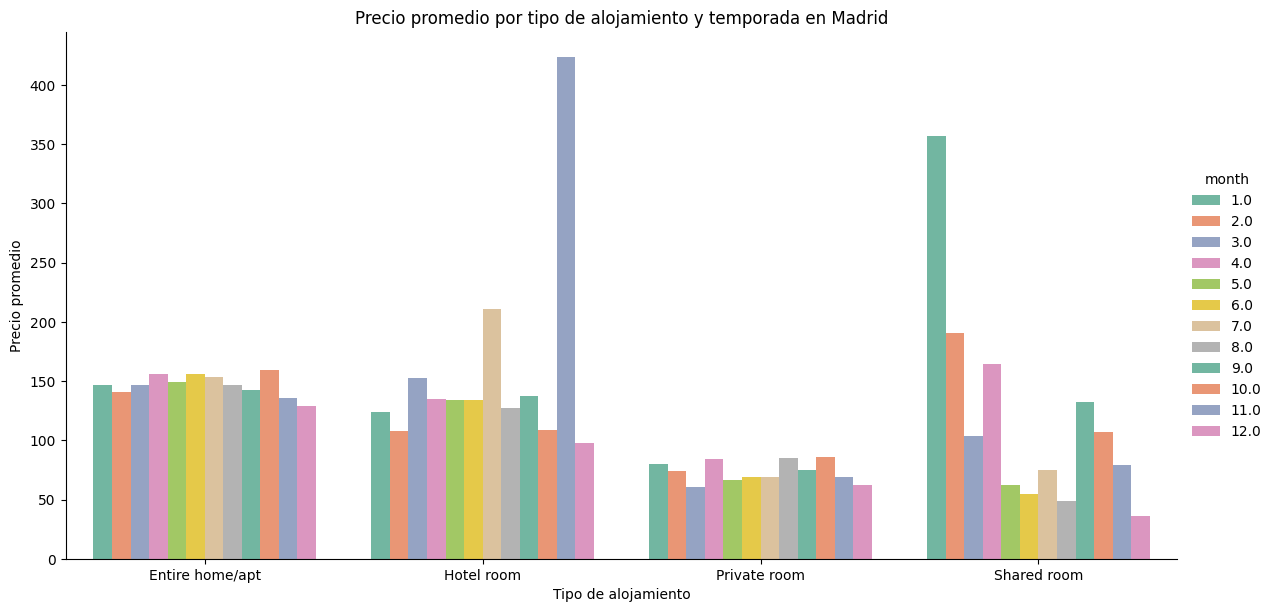



=== Análisis para Sevilla ===



C:\Users\alber\AppData\Local\Temp\ipykernel_21916\2729243627.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=city_data, x='month', y='price', palette='coolwarm')


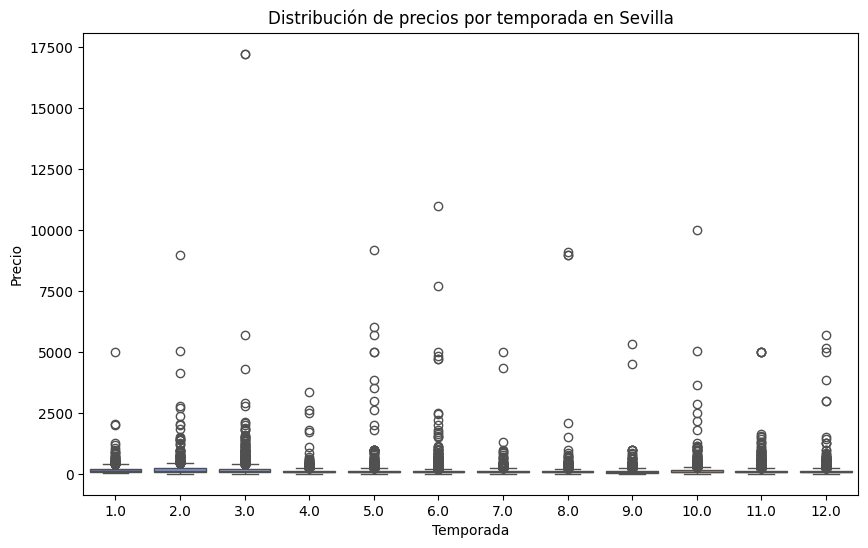

Advertencia: No hay suficientes datos para realizar las pruebas estadísticas en Sevilla.


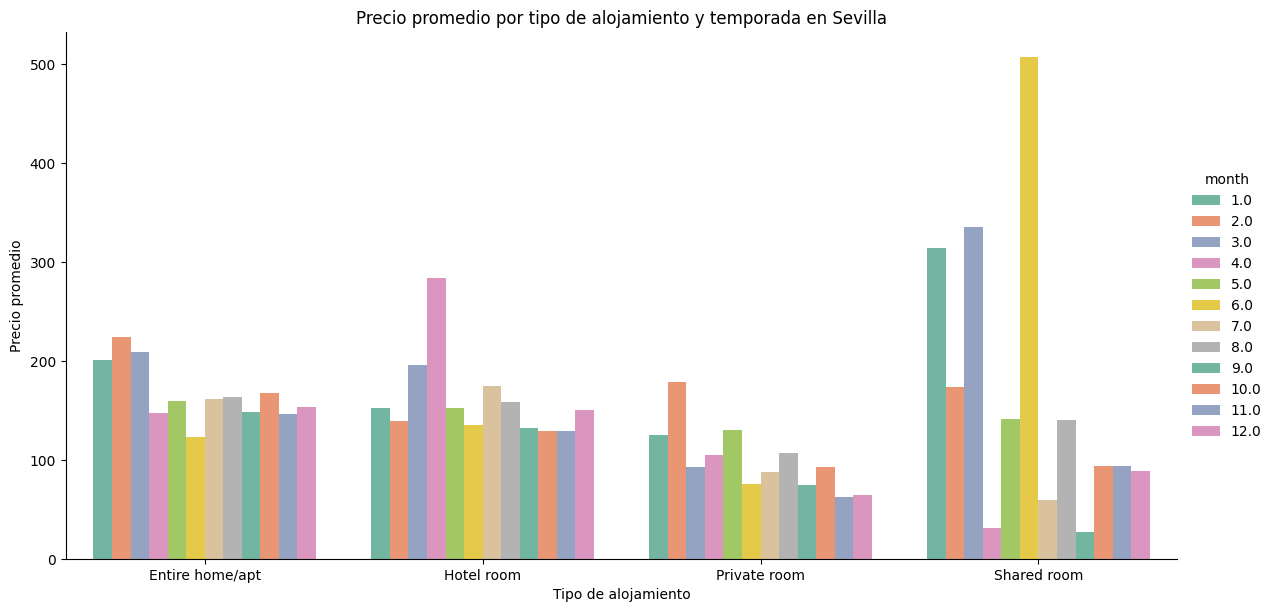

Mapa interactivo de Barcelona guardado como 'barcelona_map.html'.
Mapa interactivo de Madrid guardado como 'madrid_map.html'.
Mapa interactivo de Sevilla guardado como 'sevilla_map.html'.
Datos cargados en la base de datos SQLite.


In [5]:
# Cargar datos
file_path = r'C:\Users\alber\OneDrive\Documentos\GitHub\DS_ONLINE_THEBRIDGE_ATC\Project_Break_EDA\DataSetConjunto'
data = pd.read_csv(file_path)

# =============================
# Limpieza de datos
# =============================
# Identificar valores nulos
missing_values = data.isnull().sum()
print("Valores nulos por columna:\n", missing_values)

# Rellenar valores nulos en columnas importantes
data['price'] = data['price'].fillna(data['price'].median())
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)

# Eliminar columnas innecesarias (si aplica)
data = data.drop(columns=['license'], errors='ignore')

# Crear columnas adicionales útiles:
data['month'] = pd.to_datetime(data['last_review'], errors='coerce').dt.month

# =============================
# Exploración inicial
# =============================
data.head()  # Verificar las primeras filas
data.info()  # Resumen de columnas y tipos de datos
data.describe()  # Descripción estadística general

# =============================
# Análisis exploratorio
# =============================
# Estacionalidad de precios
price_by_month = data.groupby(['state', 'month'])['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=price_by_month, x='month', y='price', hue='state', marker='o')
plt.title('Precio promedio por mes y ciudad')
plt.xlabel('Mes')
plt.ylabel('Precio promedio')
plt.legend(title='Ciudad')
plt.show()

# Comparación de precios entre ciudades
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='state', y='price')
plt.title('Distribución de precios por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Precio')
plt.show()

# Tipo de alojamiento
room_type_stats = data.groupby(['state', 'room_type'])['price'].mean().reset_index()
sns.catplot(data=room_type_stats, x='room_type', y='price', hue='state', kind='bar', height=6, aspect=2)
plt.title('Precio promedio por tipo de alojamiento y ciudad')
plt.xlabel('Tipo de alojamiento')
plt.ylabel('Precio promedio')
plt.show()

# Popularidad de barrios
popular_neighbourhoods = data.groupby(['state', 'neighbourhood'])['number_of_reviews'].sum().reset_index()
popular_neighbourhoods = popular_neighbourhoods.sort_values(by='number_of_reviews', ascending=False).groupby('state').head(10)
sns.barplot(data=popular_neighbourhoods, y='neighbourhood', x='number_of_reviews', hue='state')
plt.title('Barrios más populares por ciudad (según reseñas)')
plt.xlabel('Número de reseñas')
plt.ylabel('Barrio')
plt.show()

# =============================
# Clustering de barrios según comportamiento estacional
# =============================
cluster_data = data.groupby(['neighbourhood', 'month'])['price'].mean().unstack().fillna(0)
print("Estructura de cluster_data:", cluster_data.shape)
print("Primeras filas de cluster_data:\n", cluster_data.head())

if cluster_data.shape[1] > 1:
    # Escalado de los datos
    scaler = StandardScaler()
    cluster_scaled = scaler.fit_transform(cluster_data)

    # KMeans clustering
    kmeans = KMeans(n_clusters=4, random_state=42).fit(cluster_scaled)
    cluster_data['Cluster'] = kmeans.labels_

    # Visualización de clusters
    sns.scatterplot(x=cluster_scaled[:, 0], y=cluster_scaled[:, 1], hue=kmeans.labels_, palette='tab10')
    plt.title("Clusters de barrios según estacionalidad")
    plt.xlabel("Componente 1")
    plt.ylabel("Componente 2")
    plt.legend(title="Cluster")
    plt.show()
else:
    print("No hay suficientes columnas para realizar el clustering.")

# Regresión múltiple para impacto de ubicación
data['latitude_scaled'] = StandardScaler().fit_transform(data[['latitude']])
data['longitude_scaled'] = StandardScaler().fit_transform(data[['longitude']])
X = data[['latitude_scaled', 'longitude_scaled', 'availability_365']]
y = data['price']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

# =============================
# Funciones de análisis por ciudad
# =============================
def analyze_city(city_name):
    print(f"\n\n=== Análisis para {city_name} ===\n")
    
    # Filtrar datos de la ciudad
    city_data = data[data['state'] == city_name]
    
    # Distribución de precios por temporada
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=city_data, x='month', y='price', palette='coolwarm')
    plt.title(f'Distribución de precios por temporada en {city_name}')
    plt.xlabel('Temporada')
    plt.ylabel('Precio')
    plt.show()

    # Filtrar precios para las dos temporadas
    high_season_prices = city_data[city_data['month'] == 'Alta']['price'].dropna()
    low_season_prices = city_data[city_data['month'] == 'Baja']['price'].dropna()

    # Verificar que ambas muestras tengan más de 1 valor para realizar las pruebas
    if len(high_season_prices) > 1 and len(low_season_prices) > 1:
        # Prueba estadística: t-test
        t_stat, p_value = ttest_ind(high_season_prices, low_season_prices, nan_policy='omit')
        print(f"T-test ({city_name}): t-stat = {t_stat:.2f}, p-value = {p_value:.5f}")
        
        # Mann-Whitney U
        u_stat, p_value_u = mannwhitneyu(high_season_prices, low_season_prices, alternative='two-sided')
        print(f"Mann-Whitney U ({city_name}): U-stat = {u_stat:.2f}, p-value = {p_value_u:.5f}")
    else:
        print(f"Advertencia: No hay suficientes datos para realizar las pruebas estadísticas en {city_name}.")

    # Comparación por tipo de alojamiento
    room_season_prices = city_data.groupby(['month', 'room_type'])['price'].mean().reset_index()
    sns.catplot(data=room_season_prices, x='room_type', y='price', hue='month', kind='bar', height=6, aspect=2, palette='Set2')
    plt.title(f'Precio promedio por tipo de alojamiento y temporada en {city_name}')
    plt.xlabel('Tipo de alojamiento')
    plt.ylabel('Precio promedio')
    plt.show()

# Análisis para las tres ciudades
for city in ['Barcelona', 'Madrid', 'Sevilla']:
    analyze_city(city)

# Visualización geográfica para las ciudades
for city in ['Barcelona', 'Madrid', 'Sevilla']:
    city_data = data[data['state'] == city]
    city_map = folium.Map(location=[city_data['latitude'].mean(), city_data['longitude'].mean()], zoom_start=12)
    for _, row in city_data.iterrows():
        folium.CircleMarker(
            location=(row['latitude'], row['longitude']),
            radius=2,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.5
        ).add_to(city_map)
    city_map.save(f'{city.lower()}_map.html')
    print(f"Mapa interactivo de {city} guardado como '{city.lower()}_map.html'.")

# =============================
# Guardado de datos en SQLite
# =============================
# Conecta a una base de datos SQLite
conn = sqlite3.connect('df_concatenado_total') 

# Carga el DataFrame en una tabla llamada 'data'
df_concatenado_total.to_sql('data', conn, if_exists='replace', index=False)
print("Datos cargados en la base de datos SQLite.")

# Función para ejecutar consultas SQL
def run_query(query, connection):
    return pd.read_sql(query, connection)


In [6]:
# Consulta para estacionalidad:
query = '''
SELECT state, month, AVG(price) as avg_price
FROM data
GROUP BY state, month
ORDER BY month;
'''
df_resultado = run_query(query, conn)
df_resultado

,state,month,avg_price
0,Barcelona,December,126.494083
1,Madrid,December,129.016058
2,Sevilla,December,126.494083
3,Barcelona,June,196.379419
4,Madrid,June,137.353932
5,Sevilla,June,135.882729
6,Barcelona,March,146.488264
7,Madrid,March,137.574294
8,Sevilla,March,228.041796
9,Barcelona,September,168.633575


In [7]:
# Comparación entre ciudades:
query = '''
SELECT state, AVG(price) as avg_price, COUNT(id) as total_listings
FROM data
GROUP BY state;
'''
df_resultado = run_query(query, conn)
df_resultado

,state,avg_price,total_listings
0,Barcelona,159.179998,75247
1,Madrid,136.081448,105471
2,Sevilla,153.163467,33919


In [8]:
# Tipo de alojamiento:
query = '''
SELECT state, room_type, AVG(price) as avg_price
FROM data
GROUP BY state, room_type;
'''
df_resultado = run_query(query, conn)
df_resultado

,state,room_type,avg_price
0,Barcelona,Entire home/apt,194.109269
1,Barcelona,Hotel room,196.082508
2,Barcelona,Private room,86.061618
3,Barcelona,Shared room,73.608519
4,Madrid,Entire home/apt,162.013813
5,Madrid,Hotel room,250.770318
6,Madrid,Private room,75.472552
7,Madrid,Shared room,107.692863
8,Sevilla,Entire home/apt,170.754776
9,Sevilla,Hotel room,166.112426


In [9]:
# Popularidad de barrios:
query = '''
SELECT state, neighbourhood, SUM(number_of_reviews) as total_reviews
FROM data
GROUP BY state, neighbourhood
ORDER BY total_reviews DESC
LIMIT 15;
'''
df_resultado = run_query(query, conn)
df_resultado

,state,neighbourhood,total_reviews
0,Madrid,Embajadores,756509
1,Madrid,Universidad,571160
2,Barcelona,la Dreta de l'Eixample,562586
3,Madrid,Palacio,490336
4,Madrid,Sol,454452
5,Madrid,Cortes,326041
6,Barcelona,la Sagrada Família,282353
7,Madrid,Justicia,274716
8,Barcelona,la Vila de Gràcia,265675
9,Barcelona,el Poble Sec,231172


In [10]:
# Hosts más activos:
query = '''
SELECT host_id, COUNT(id) as total_listings, AVG(price) as avg_price
FROM data
GROUP BY host_id
ORDER BY total_listings DESC
LIMIT 15;
'''
df_resultado = run_query(query, conn)
df_resultado

,host_id,total_listings,avg_price
0,346367515,2938,157.273368
1,357946540,1623,32.267593
2,377605855,1192,209.118317
3,291253690,1154,176.025986
4,32037490,1086,207.392066
5,1447144,957,480.306490
6,4459553,929,254.749175
7,518713670,893,66.329193
8,434208714,777,130.978947
9,438136382,763,134.013850


In [11]:
# Temporadas:
query = '''
SELECT state, CASE WHEN month IN (6, 7, 8, 12) THEN 'Alta' ELSE 'Baja' END as season, AVG(price) as avg_price
FROM data
GROUP BY state, season;
'''
df_resultado = run_query(query, conn)
df_resultado

,state,season,avg_price
0,Barcelona,Baja,159.179998
1,Madrid,Baja,136.081448
2,Sevilla,Baja,153.163467


In [12]:
# Lista de ciudades a analizar
cities = ['Barcelona', 'Madrid', 'Sevilla']

# Consultas para todas las ciudades
for city in cities:
    print(f"\nEjecutando análisis para {city}...")

    # Consulta 1: Precio promedio por temporada
    query_1 = f'''
    SELECT season, AVG(price) AS avg_price
    FROM (
        SELECT *, 
               CASE WHEN month IN (6, 7, 8, 12) THEN 'Alta' ELSE 'Baja' END AS season
        FROM data
        WHERE state = '{city}'  -- Ciudad dinámica
    ) AS temp
    GROUP BY season;
    '''
    df_resultado_1 = run_query(query_1, conn)
    print(f"\nPromedio de precios por temporada para {city}:\n", df_resultado_1)

    # Consulta 2: Precio promedio por temporada y tipo de alojamiento
    query_2 = f'''
    SELECT season, room_type, AVG(price) AS avg_price
    FROM (
        SELECT *, 
               CASE WHEN month IN (6, 7, 8, 12) THEN 'Alta' ELSE 'Baja' END AS season
        FROM data
        WHERE state = '{city}'  -- Ciudad dinámica
    ) AS temp
    GROUP BY season, room_type;
    '''
    df_resultado_2 = run_query(query_2, conn)
    print(f"\nPromedio de precios por temporada y tipo de alojamiento para {city}:\n", df_resultado_2)

    # Consulta 3: Precio promedio por mes y temporada
    query_3 = f'''
    SELECT month, season, AVG(price) AS avg_price
    FROM (
        SELECT *, 
               CASE WHEN month IN (6, 7, 8, 12) THEN 'Alta' ELSE 'Baja' END AS season
        FROM data
        WHERE state = '{city}'  -- Ciudad dinámica
    ) AS temp
    GROUP BY month, season
    ORDER BY month;
    '''
    df_resultado_3 = run_query(query_3, conn)
    print(f"\nPromedio de precios por mes y temporada para {city}:\n", df_resultado_3)




Ejecutando análisis para Barcelona...

Promedio de precios por temporada para Barcelona:
   season   avg_price
0   Baja  159.179998

Promedio de precios por temporada y tipo de alojamiento para Barcelona:
   season        room_type   avg_price
0   Baja  Entire home/apt  194.109269
1   Baja       Hotel room  196.082508
2   Baja     Private room   86.061618
3   Baja      Shared room   73.608519

Promedio de precios por mes y temporada para Barcelona:
        month season   avg_price
0   December   Baja  126.494083
1       June   Baja  196.379419
2      March   Baja  146.488264
3  September   Baja  168.633575

Ejecutando análisis para Madrid...

Promedio de precios por temporada para Madrid:
   season   avg_price
0   Baja  136.081448

Promedio de precios por temporada y tipo de alojamiento para Madrid:
   season        room_type   avg_price
0   Baja  Entire home/apt  162.013813
1   Baja       Hotel room  250.770318
2   Baja     Private room   75.472552
3   Baja      Shared room  107.6928

=== Análisis de Barcelona ===

Valores nulos por columna:
id                                    0
name                                  0
host_id                               0
host_name                             8
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                             13924
minimum_nights                        0
number_of_reviews                     0
last_review                       18664
reviews_per_month                 18664
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           24267
month                                 0
state                                 0
dtype: int64




C:\Users\alber\AppData\Local\Temp\ipykernel_21916\1923941101.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ciudad['price'] = pd.to_numeric(df_ciudad['price'], errors='coerce')


Total de registros después de filtrar precios <= 1000: 60979



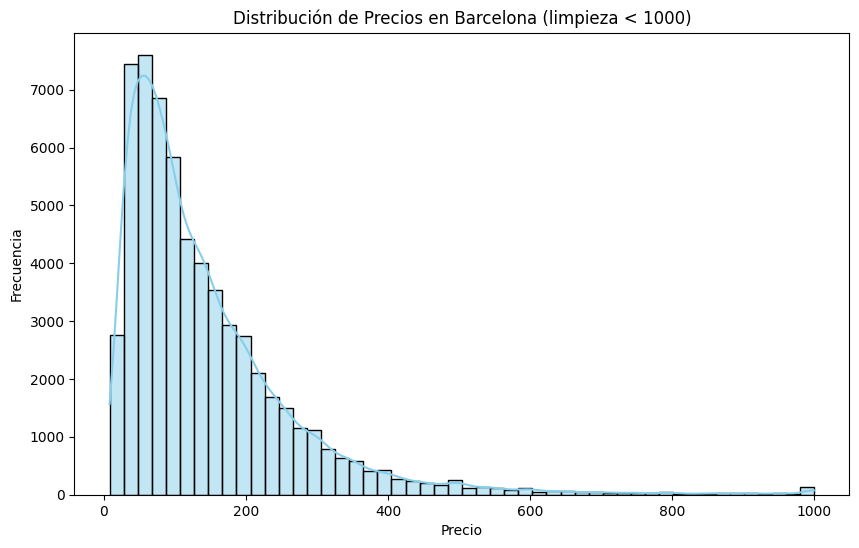

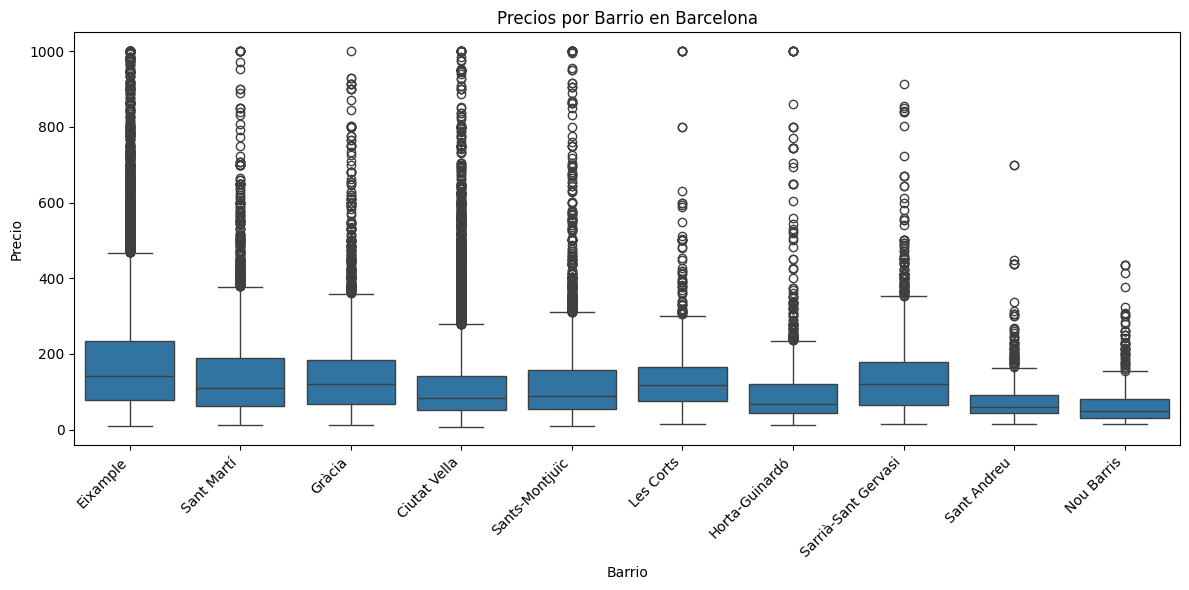

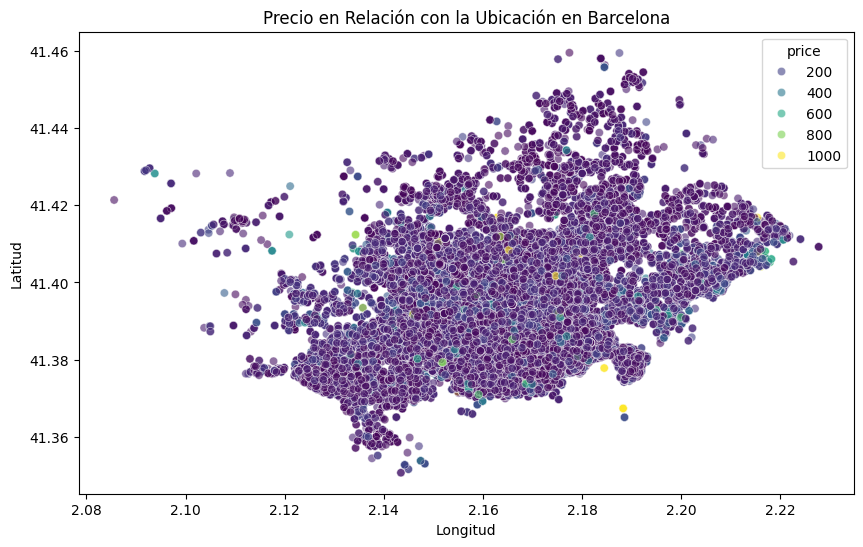

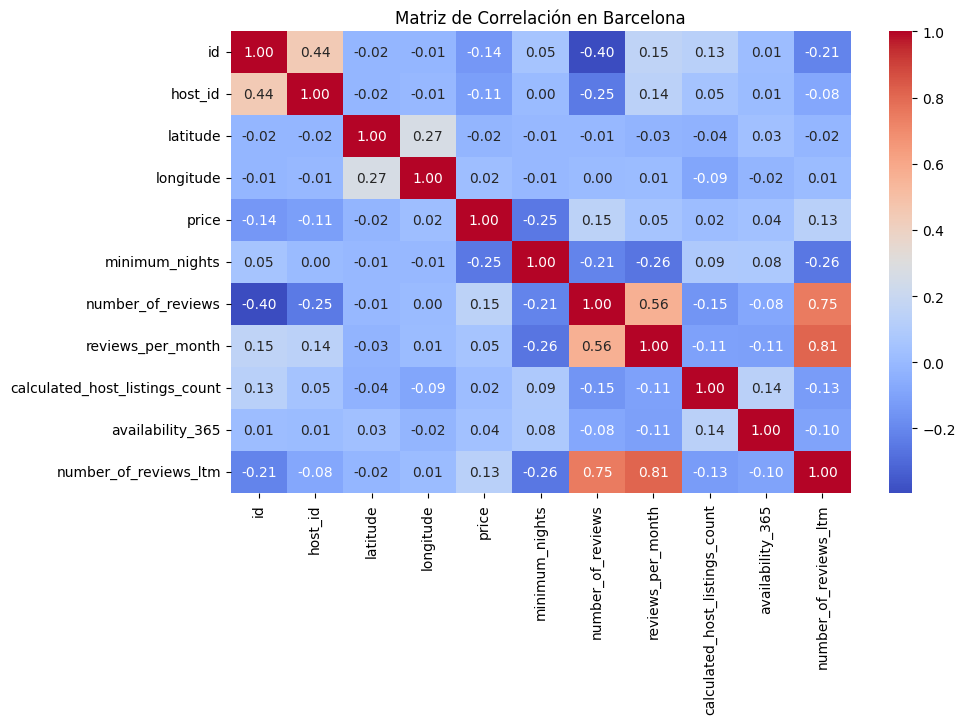

Top 10 propiedades más caras en Barcelona
                                                    name neighbourhood_group  \
5311   Sail & sleep on sailboat in Barcelona port oli...        Ciutat Vella   
8898                                 Blau Atic Apartment        Ciutat Vella   
10215                                Habitacion familiar        Ciutat Vella   
11085            BBARCELONA SAGRADA FAMILIA FLATS - 1011          Sant Martí   
15367                            35. Galileu B Apartment           Les Corts   
16020                                        78- Baro SA      Horta-Guinardó   
16039                                       075. Baro 22      Horta-Guinardó   
16479                          21fh - Beautiful 1BR flat      Sants-Montjuïc   
16480                          31fh - Beautiful 1BR flat      Sants-Montjuïc   
16481                          22fh - Beautiful 1BR flat      Sants-Montjuïc   

        price        room_type  
5311   1000.0  Entire home/apt  
8898   1000

C:\Users\alber\AppData\Local\Temp\ipykernel_21916\1923941101.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ciudad['price'] = pd.to_numeric(df_ciudad['price'], errors='coerce')


Total de registros después de filtrar precios <= 1000: 84767



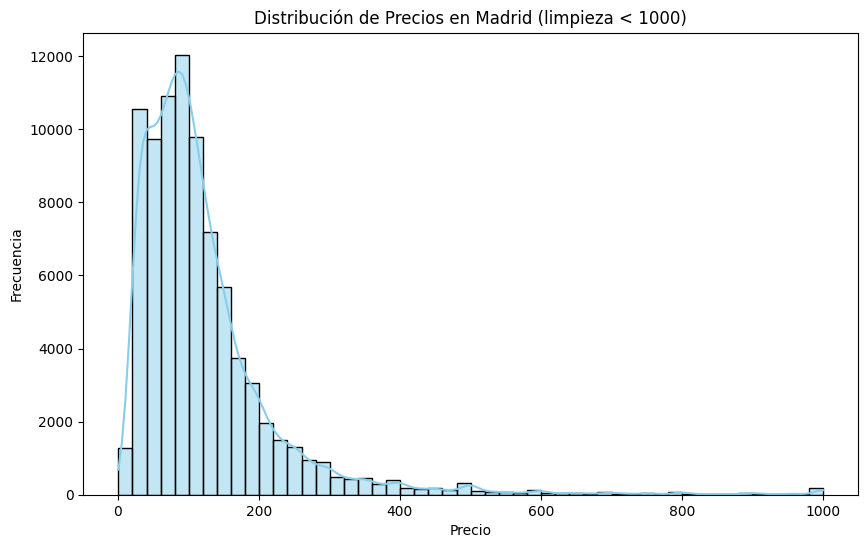

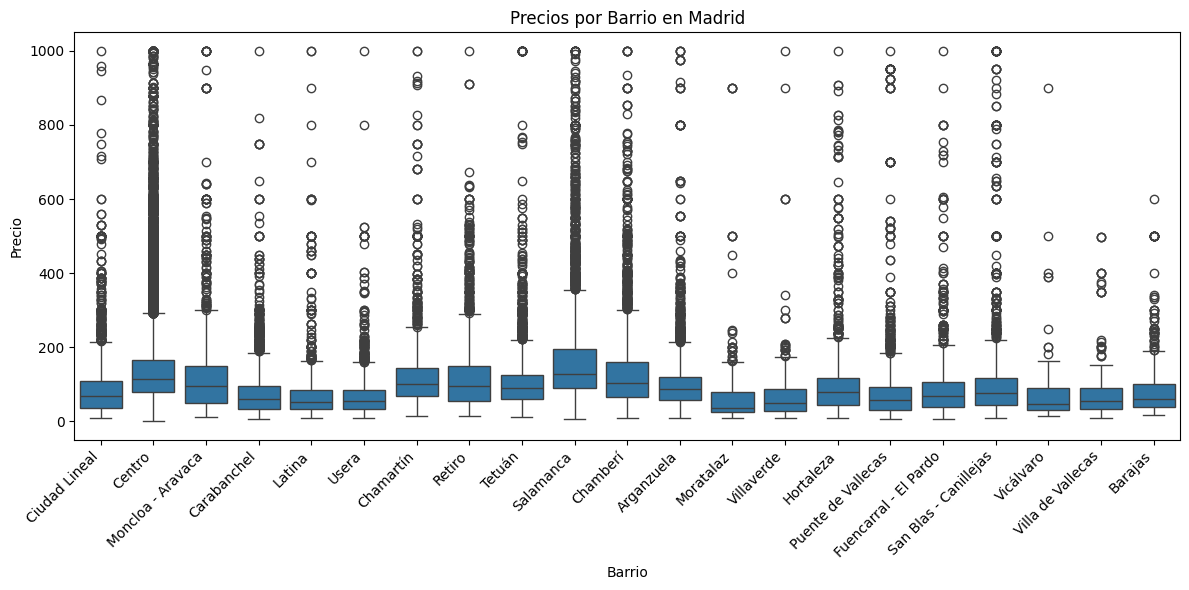

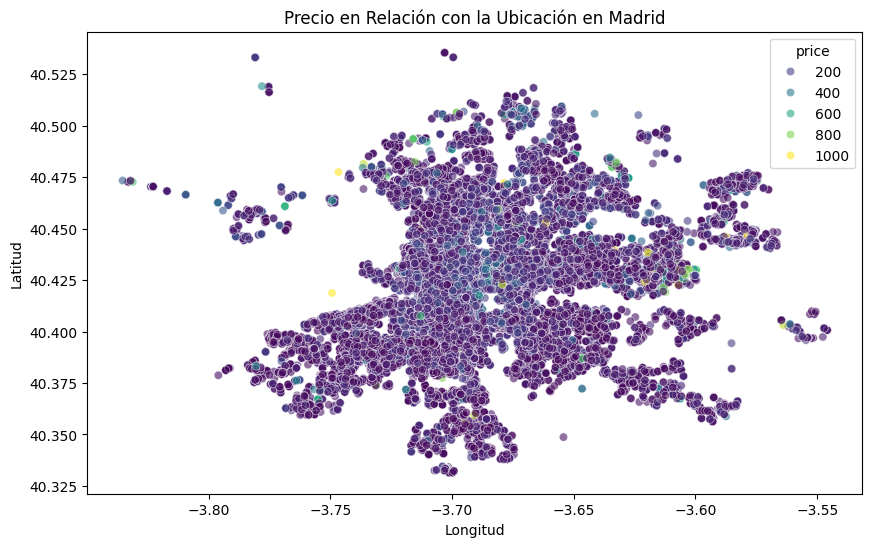

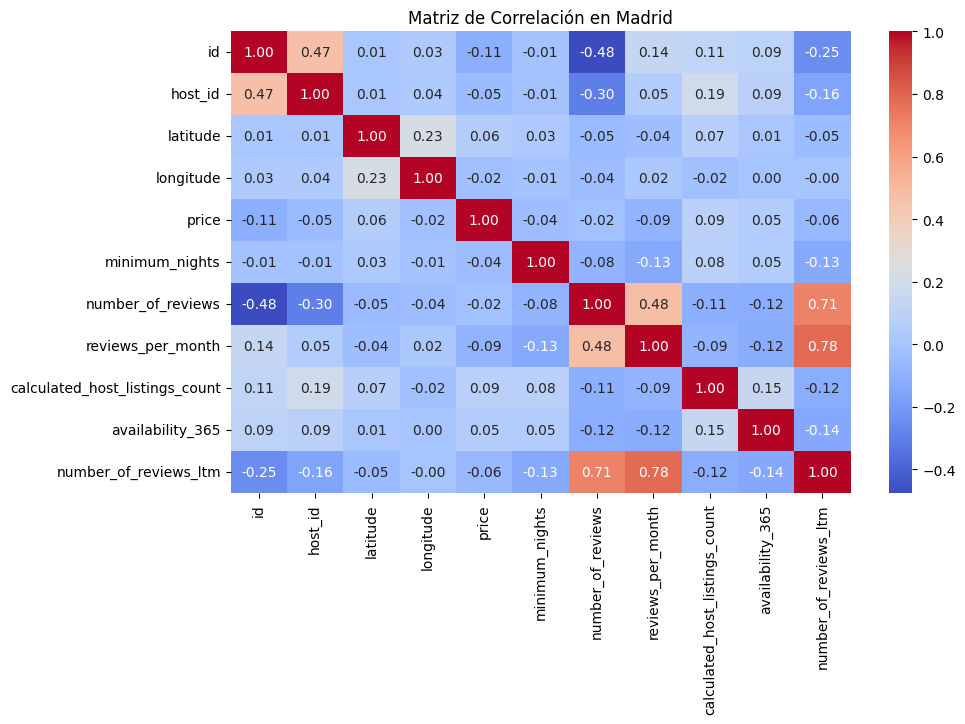

Top 10 propiedades más caras en Madrid
                                                    name neighbourhood_group  \
630    Room and living with bath and kitchen in Malasaña              Centro   
5711                   Habitación doble en centro Madrid              Centro   
5748                        Hotel Regente, Doble Standar              Centro   
5835                           Apt Madrid - Pets Allowed              Centro   
8388               Three bedroom apartment near Gran Vía   Moncloa - Aravaca   
9066                                    Luxury Jerónimos              Retiro   
9550                     A COSY RETREAT NEAR PLAZA MAYOR              Centro   
9574                           Apartment, Central Madrid              Centro   
11085                             Habitación Matrimonial              Tetuán   
11679              The First One Madrid, Deluxe Superior              Centro   

        price        room_type  
630    1000.0     Private room  
5711   1000.0 

C:\Users\alber\AppData\Local\Temp\ipykernel_21916\1923941101.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ciudad['price'] = pd.to_numeric(df_ciudad['price'], errors='coerce')


Total de registros después de filtrar precios <= 1000: 30618



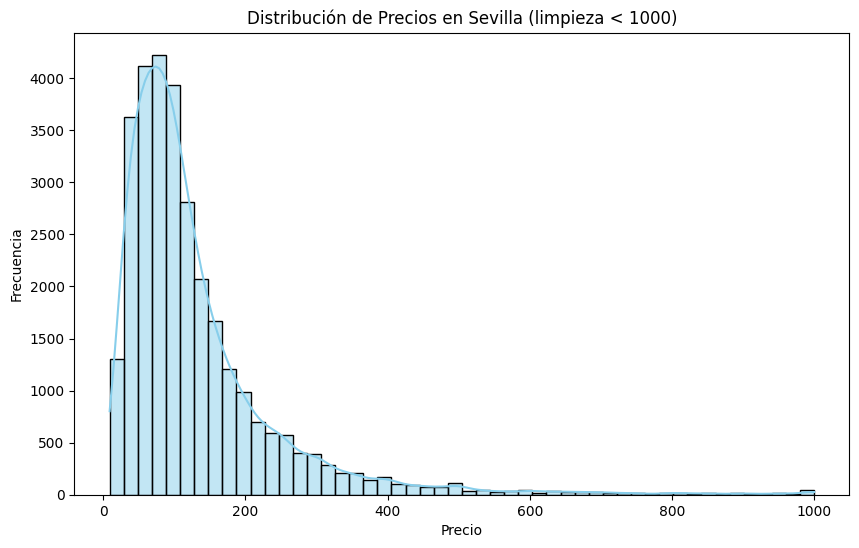

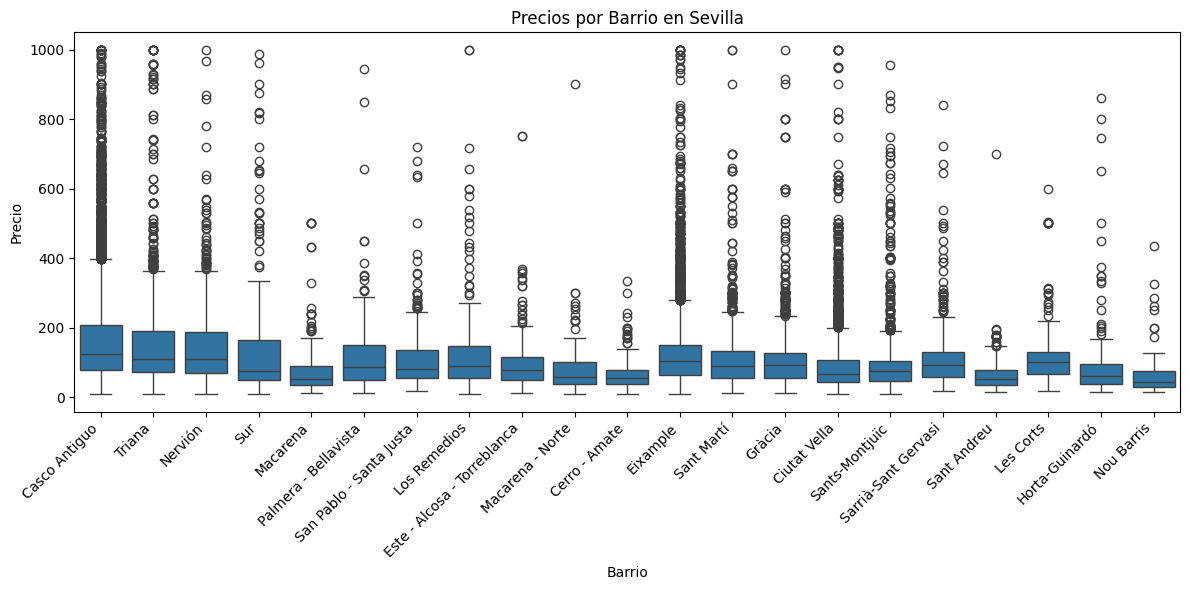

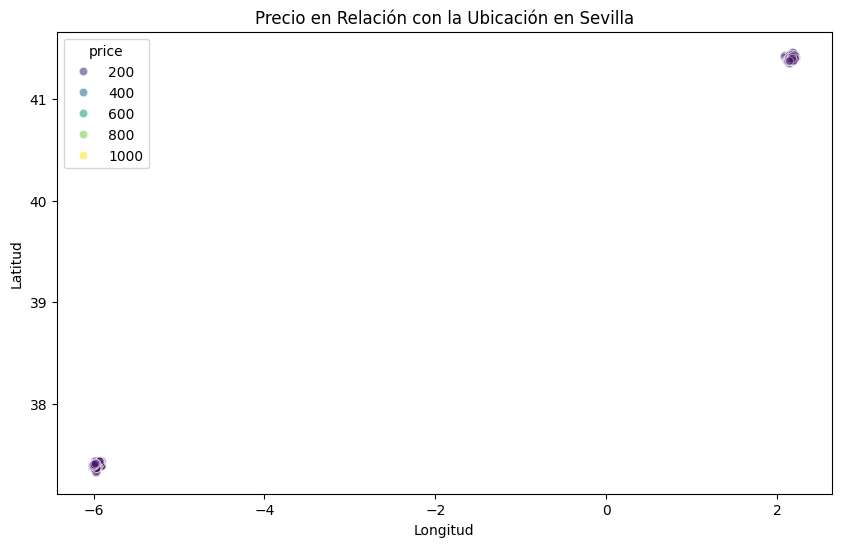

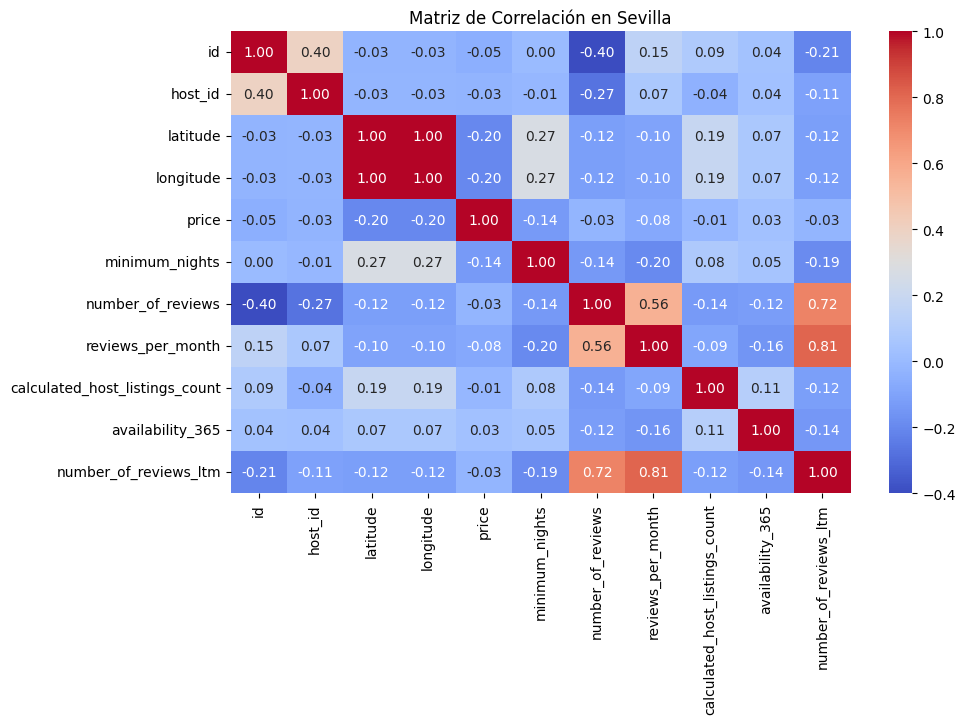

Top 10 propiedades más caras en Sevilla
                                                name neighbourhood_group  \
1612                              Un sueño en Triana              Triana   
1915       Luminoso Apartamento Arenal + Parking 20€       Casco Antiguo   
3705  Apartamento centro Sevilla, amplio y luminoso.       Casco Antiguo   
3823                             No esta disponibles        Los Remedios   
5470        Cama en habitación mixta para 8 personas       Casco Antiguo   
5474     Cama en habitación femenina para 8 personas       Casco Antiguo   
5485       Cama en habitación mixta para 10 personas       Casco Antiguo   
5500     Cama en habitación femenina para 4 personas       Casco Antiguo   
5502        Cama en habitación mixta para 4 personas       Casco Antiguo   
5724                 Elegante y céntrico apartamento       Casco Antiguo   

       price        room_type  
1612  1000.0     Private room  
1915  1000.0  Entire home/apt  
3705  1000.0  Entire home/a

In [13]:
# Función para realizar el análisis
def analizar_ciudad(df_ciudad, nombre_ciudad, limite_precio=1000):
    print(f"=== Análisis de {nombre_ciudad} ===\n")
    
    # 1. Verificar valores nulos
    print("Valores nulos por columna:")
    print(df_ciudad.isnull().sum())
    print("\n")

    # 2. Limpiar la columna 'price'
    # Convertir 'price' a string y eliminar símbolos como "$" y ","
    df_ciudad['price'] = df_ciudad['price'].astype(str).replace({'\\$': '', ',': ''}, regex=True)
    
    # Identificar y filtrar solo valores numéricos válidos
    df_ciudad = df_ciudad[df_ciudad['price'].str.replace('.', '', regex=False).str.isdigit()]
    df_ciudad['price'] = pd.to_numeric(df_ciudad['price'], errors='coerce')

    # Eliminar filas donde 'price' sea nulo después de la conversión
    df_ciudad = df_ciudad.dropna(subset=['price'])

    # 3. Filtrar precios válidos dentro del límite especificado
    df_filtrado = df_ciudad[df_ciudad['price'] <= limite_precio]
    print(f"Total de registros después de filtrar precios <= {limite_precio}: {len(df_filtrado)}\n")

    # 4. Gráfico de distribución de precios
    plt.figure(figsize=(10, 6))
    sns.histplot(df_filtrado['price'], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribución de Precios en {nombre_ciudad} (limpieza < {limite_precio})')
    plt.xlabel('Precio')
    plt.ylabel('Frecuencia')
    plt.show()

    # 5. Boxplot de precios por barrio con etiquetas ajustadas
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='neighbourhood_group', y='price', data=df_filtrado)
    plt.title(f'Precios por Barrio en {nombre_ciudad}')
    plt.xlabel('Barrio')
    plt.ylabel('Precio')
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotar etiquetas y ajustar alineación
    plt.tight_layout()  # Ajustar automáticamente el espacio del gráfico
    plt.show()

    # 6. Gráfico de dispersión: Precio vs Ubicación
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='longitude', y='latitude', hue='price', data=df_filtrado, palette='viridis', alpha=0.6)
    plt.title(f'Precio en Relación con la Ubicación en {nombre_ciudad}')
    plt.xlabel('Longitud')
    plt.ylabel('Latitud')
    plt.show()

    # 7. Matriz de correlación (solo para columnas numéricas)
    columnas_numericas = df_filtrado.select_dtypes(include=['number']).columns
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_filtrado[columnas_numericas].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Matriz de Correlación en {nombre_ciudad}')
    plt.show()

    # 8. Top 10 propiedades más caras
    top_expensive = df_filtrado.nlargest(10, 'price')
    print(f"Top 10 propiedades más caras en {nombre_ciudad}")
    print(top_expensive[['name', 'neighbourhood_group', 'price', 'room_type']])
    
    print("\n--- Fin del Análisis ---\n")

# === Análisis para las 3 ciudades ===
analizar_ciudad(df_concatenado_Barcelona, "Barcelona")
analizar_ciudad(df_concatenado_Madrid, "Madrid")
analizar_ciudad(df_concatenado_Sevilla, "Sevilla")
